In [36]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/malte.luecken/helmholtz_munich/benchmarking_data_integration/Benchmarking_data_integration/notebooks/analysis


In [4]:
files = !ls ../../../Paper/202010_Revision/Supplementary\ Files/Results/*.csv

In [5]:
data = {file:pd.read_csv(file) for file in files}

In [6]:
data[files[0]]

,Unnamed: 0,Method,Output,Features,Scaling,Overall Score,Batch Correction,PCR batch,Batch ASW,graph iLISI,...,Bio conservation,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
0,331,scGen*,gene,HVG,unscaled,0.663452,0.546431,0.593345,0.841671,0.106118,...,0.741467,0.904241,0.849627,0.675813,0.155460,0.391633,1.000000,0.491212,0.416649,0.925860
1,43,Scanorama,embed,HVG,scaled,0.642488,0.615550,0.901327,0.955880,0.107809,...,0.660446,0.637543,0.540902,0.501580,0.159606,0.474661,0.967787,0.706393,NaN,0.888212
2,247,scVI,embed,HVG,unscaled,0.630484,0.586432,0.870668,0.917481,0.078631,...,0.659851,0.687811,0.544036,0.518036,0.183759,0.397630,0.988365,0.569934,NaN,0.934886
3,44,Scanorama,embed,FULL,scaled,0.627593,0.566742,0.904613,0.940262,0.074805,...,0.668161,0.652132,0.476423,0.489695,0.140711,0.551462,0.987966,0.659911,NaN,0.913838
4,223,BBKNN,graph,HVG,unscaled,0.627318,0.858917,NaN,NaN,0.347902,...,0.472918,0.570298,0.493649,NaN,0.248603,NaN,0.788703,NaN,NaN,0.682456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,91,Seurat v3 CCA,gene,HVG,scaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,92,Seurat v3 CCA,gene,FULL,scaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,175,trVAE,embed,HVG,unscaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,176,trVAE,embed,FULL,unscaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Concatenate all metrics tasks

In [16]:
merged = pd.concat(data.values())

In [17]:
merged.columns

Index(['Unnamed: 0', 'Method', 'Output', 'Features', 'Scaling',
       'Overall Score', 'Batch Correction', 'PCR batch', 'Batch ASW',
       'graph iLISI', 'graph connectivity', 'kBET', 'Bio conservation',
       'NMI cluster/label', 'ARI cluster/label', 'Cell type ASW',
       'isolated label F1', 'isolated label silhouette', 'graph cLISI',
       'CC conservation', 'HVG conservation', 'trajectory conservation'],
      dtype='object')

In [18]:
#Drop NA results
merged = merged.loc[~np.isnan(merged['Overall Score']),:]

In [19]:
#Drop non-metrics columns
merged = merged.drop(columns=['Unnamed: 0', 'Method', 'Output', 'Features', 'Scaling',
       'Overall Score', 'Batch Correction', 'Bio conservation'])

In [20]:
merged

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
0,0.593345,0.841671,0.106118,0.973165,0.090168,0.904241,0.849627,0.675813,0.155460,0.391633,1.000000,0.491212,0.416649,0.925860
1,0.901327,0.955880,0.107809,0.771782,0.102683,0.637543,0.540902,0.501580,0.159606,0.474661,0.967787,0.706393,NaN,0.888212
2,0.870668,0.917481,0.078631,0.921558,0.001651,0.687811,0.544036,0.518036,0.183759,0.397630,0.988365,0.569934,NaN,0.934886
3,0.904613,0.940262,0.074805,0.783868,0.007120,0.652132,0.476423,0.489695,0.140711,0.551462,0.987966,0.659911,NaN,0.913838
4,NaN,NaN,0.347902,0.931753,0.467357,0.570298,0.493649,NaN,0.248603,NaN,0.788703,NaN,NaN,0.682456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.988459,0.929500,0.424124,0.362890,0.000086,0.045155,0.016866,0.474281,0.396804,0.561110,0.857597,NaN,0.051999,NaN
61,0.000000,0.699457,0.159569,0.557284,0.005740,0.136133,0.077083,0.393583,0.358264,0.399749,0.897569,NaN,NaN,NaN
62,0.000000,0.699453,0.159467,0.557284,0.005740,0.137155,0.068634,0.393583,0.318718,0.399749,0.898244,NaN,0.084446,NaN
63,0.000000,0.652234,0.159430,0.397708,0.002209,0.133741,0.028885,0.384295,0.297224,0.389249,0.919573,NaN,0.266496,NaN


# Create correlation plot

In [23]:
metrics_corr = merged.corr()

In [25]:
metrics_corr

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
PCR batch,1.000000,0.331122,0.406834,0.458716,0.121902,0.160400,0.238390,0.231394,0.075092,0.071022,-0.070974,-0.119309,-0.390054,0.015774
Batch ASW,0.331122,1.000000,0.272741,0.448233,0.120258,0.299812,0.411750,-0.039637,0.116796,-0.000357,-0.043810,0.252487,-0.306226,0.507494
graph iLISI,0.406834,0.272741,1.000000,0.212335,0.322048,0.248565,0.413852,0.242245,0.009832,0.029415,-0.356293,-0.078332,-0.120983,-0.097422
graph connectivity,0.458716,0.448233,0.212335,1.000000,0.316484,0.507117,0.548494,0.519917,0.306273,0.197868,0.110591,0.009500,-0.107066,0.514673
kBET,0.121902,0.120258,0.322048,0.316484,1.000000,0.192266,0.264695,0.217320,0.183557,0.083963,-0.212277,0.031098,0.089527,0.023496
NMI cluster/label,0.160400,0.299812,0.248565,0.507117,0.192266,1.000000,0.934524,0.662472,0.321535,0.212958,0.365586,0.292469,0.138845,0.474055
ARI cluster/label,0.238390,0.411750,0.413852,0.548494,0.264695,0.934524,1.000000,0.594561,0.236879,0.203409,0.225693,0.211427,0.034850,0.427448
Cell type ASW,0.231394,-0.039637,0.242245,0.519917,0.217320,0.662472,0.594561,1.000000,0.413699,0.304463,0.527967,-0.053541,0.099033,0.336569
isolated label F1,0.075092,0.116796,0.009832,0.306273,0.183557,0.321535,0.236879,0.413699,1.000000,0.266790,0.226035,-0.028445,0.039893,0.294267
isolated label silhouette,0.071022,-0.000357,0.029415,0.197868,0.083963,0.212958,0.203409,0.304463,0.266790,1.000000,0.112948,0.061874,-0.059251,0.336853


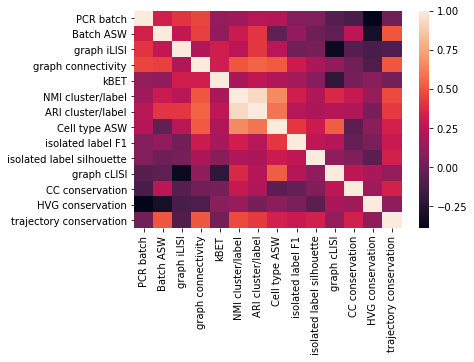

In [24]:
sns.heatmap(metrics_corr)

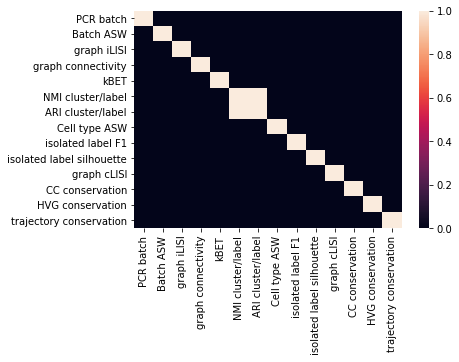

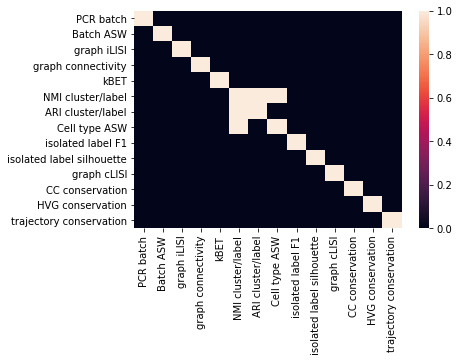

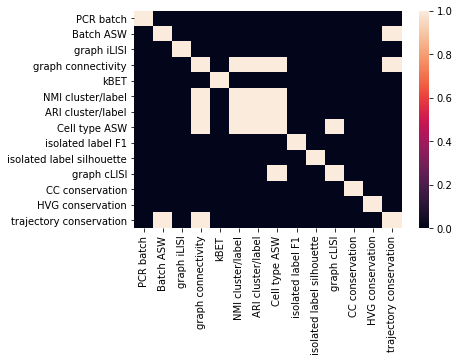

In [37]:
sns.heatmap(metrics_corr > 0.7)
plt.show()

sns.heatmap(metrics_corr > 0.6)
plt.show()

sns.heatmap(metrics_corr > 0.5)
plt.show()

Correlation results:
- Only NMI/ARI cluster/label are closely correlated (pearson R=0.93) in RNA and simulation tasks
  - this is likely the most important assessment of bio conservation, thus double metric means it is up-weighted, which may be relevant
- Cell type ASW correlated with cluster NMI score at 0.66, but this gives different info as shown in FastMNN HVG/scaled results on mouse brain

# Effective range of metrics

In [40]:
merged.describe()

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
count,393.000000,387.000000,441.000000,441.000000,402.000000,441.000000,441.000000,387.000000,441.000000,387.000000,441.000000,275.000000,196.000000,131.000000
mean,0.775596,0.829402,0.206436,0.787979,0.183640,0.682717,0.556948,0.570263,0.528840,0.493908,0.969414,0.599518,0.299479,0.720470
std,0.285108,0.115297,0.161236,0.250268,0.250472,0.219118,0.298838,0.093518,0.344618,0.113594,0.061170,0.180447,0.193214,0.211714
min,0.000000,0.313182,0.000000,0.032869,0.000000,0.007093,0.002259,0.239947,0.013652,0.030170,0.610511,0.126080,0.029739,0.000000
25%,0.695873,0.781814,0.072440,0.661741,0.007081,0.568383,0.314839,0.515435,0.155627,0.463732,0.972888,0.485211,0.160003,0.550943
50%,0.901297,0.859637,0.168905,0.896505,0.070976,0.690388,0.511049,0.565820,0.544499,0.500826,0.994329,0.612019,0.276955,0.826601
75%,0.962123,0.903650,0.327411,0.984181,0.267864,0.861368,0.864552,0.627630,0.844135,0.551659,1.000000,0.734078,0.377617,0.864579
max,1.000000,0.992010,0.593243,1.000000,0.999506,1.000000,1.000000,0.865885,1.000000,0.829837,1.000000,1.000000,1.000000,0.977800


Smallest range is cLISI from 0.61-1.0, with smallest effective range of 0.03 in 25% and 75% quantile, yet this metric is important to keep as BBKNN is biased in iLISI and therefore penalized in cLISI so it predominantly downweights BBKNN results to keep comparison fair.

# ATAC data

In [56]:
atac1 = pd.read_csv('../../../Paper/202010_Revision/Supplementary Files/Results/ATAC/mouse_brain_atac_large_11batches_summary_scores.csv')
atac2 = pd.read_csv('../../../Paper/202010_Revision/Supplementary Files/Results/ATAC/mouse_brain_atac_large_11batches_summary_scores.csv')
atac = pd.concat([atac1,atac2])

In [58]:
#Drop NA results
atac = atac.loc[~np.isnan(atac['Overall Score']),:]

#Drop non-metrics columns
atac = atac.drop(columns=['Unnamed: 0', 'Method', 'Output', 'Feature Space',
       'Overall Score', 'Batch Correction', 'Bio conservation'])

In [59]:
atac

,PCR batch,Batch ASW,iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,cLISI
0,0.883186,0.896734,0.351282,0.994617,0.772906,0.683661,0.578146,0.606743,0.706148,0.483031,0.999063
1,0.996638,0.935324,0.325948,0.992911,0.092846,0.704479,0.616729,0.594801,0.886003,0.506610,0.999054
2,0.992910,0.942639,0.269098,0.998634,0.057160,0.697919,0.583343,0.615208,0.941176,0.520949,1.000000
3,0.832315,0.932749,0.412561,0.978348,0.047268,0.750537,0.719046,0.585103,0.724123,0.516810,0.998807
4,0.678069,0.850035,0.372767,0.994609,0.888491,0.687926,0.608845,0.597087,0.635869,0.468878,0.999292
...,...,...,...,...,...,...,...,...,...,...,...
31,0.000000,0.652770,0.389365,0.474014,0.147795,0.260391,0.078321,0.361651,0.298331,0.279901,0.911377
32,0.145148,0.515064,0.385336,0.526516,0.198281,0.310198,0.156021,0.218919,0.281892,0.200401,0.950249
33,0.145148,0.495393,0.387729,0.527486,0.209207,0.277164,0.067441,0.208820,0.252429,0.200401,0.949979
34,NaN,NaN,0.000000,0.447723,0.077376,0.264648,0.100701,NaN,0.444990,NaN,0.923874


# ATAC analysis

In [60]:
atac_corr = atac.corr()
atac_corr

,PCR batch,Batch ASW,iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,cLISI
PCR batch,1.000000,0.519790,0.214352,0.388502,0.250301,0.247845,0.364577,0.500375,0.003357,0.513197,0.266210
Batch ASW,0.519790,1.000000,0.017934,0.663116,-0.076720,0.313878,0.534661,0.746730,0.410127,0.900042,0.154950
iLISI,0.214352,0.017934,1.000000,0.323566,0.191291,0.129466,0.202919,-0.335314,-0.159023,-0.135355,0.212543
graph connectivity,0.388502,0.663116,0.323566,1.000000,0.195945,0.493188,0.693041,0.519645,0.341112,0.625250,0.289841
kBET,0.250301,-0.076720,0.191291,0.195945,1.000000,-0.022330,0.044388,-0.034571,-0.257974,-0.057638,-0.166693
NMI cluster/label,0.247845,0.313878,0.129466,0.493188,-0.022330,1.000000,0.899498,0.652368,0.706030,0.473597,0.661816
ARI cluster/label,0.364577,0.534661,0.202919,0.693041,0.044388,0.899498,1.000000,0.641241,0.579321,0.581245,0.478505
Cell type ASW,0.500375,0.746730,-0.335314,0.519645,-0.034571,0.652368,0.641241,1.000000,0.676601,0.918666,0.592792
isolated label F1,0.003357,0.410127,-0.159023,0.341112,-0.257974,0.706030,0.579321,0.676601,1.000000,0.594197,0.541888
isolated label silhouette,0.513197,0.900042,-0.135355,0.625250,-0.057638,0.473597,0.581245,0.918666,0.594197,1.000000,0.388019


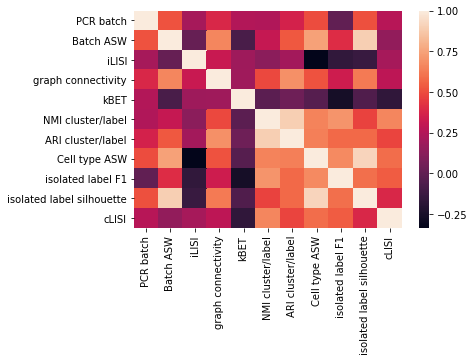

In [62]:
sns.heatmap(atac_corr)

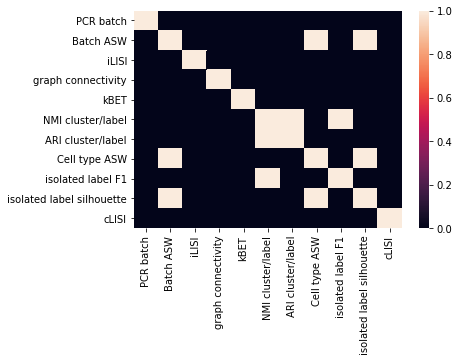

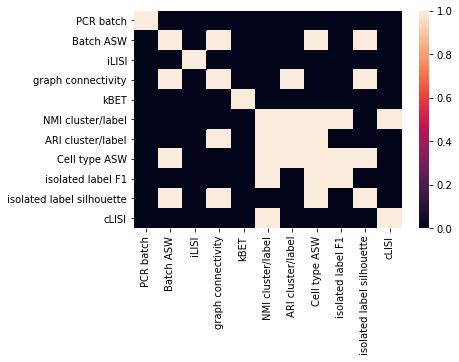

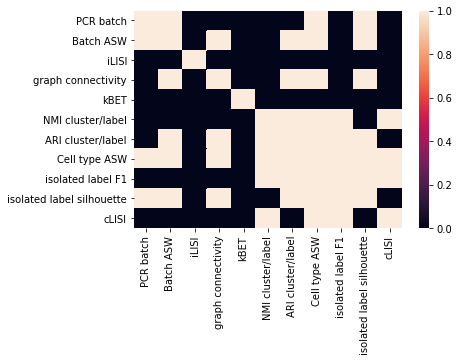

In [63]:
sns.heatmap(atac_corr > 0.7)
plt.show()

sns.heatmap(atac_corr > 0.6)
plt.show()

sns.heatmap(atac_corr > 0.5)
plt.show()

In [64]:
atac.describe()

,PCR batch,Batch ASW,iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,cLISI
count,60.000000,60.000000,72.000000,72.000000,72.000000,72.000000,72.000000,60.000000,72.000000,60.000000,72.000000
mean,0.466852,0.828276,0.353532,0.836727,0.208030,0.444919,0.333429,0.509611,0.582012,0.446115,0.954069
std,0.367682,0.160951,0.097822,0.197851,0.275102,0.194080,0.217343,0.116242,0.264499,0.103273,0.038273
min,0.000000,0.447484,0.000000,0.447192,0.000067,0.162147,0.050342,0.208820,0.134503,0.200401,0.850034
25%,0.000000,0.764443,0.345654,0.770276,0.037141,0.283421,0.153051,0.501337,0.306260,0.454635,0.934336
50%,0.511901,0.893182,0.379402,0.973573,0.092124,0.346306,0.256630,0.521603,0.563085,0.490875,0.950114
75%,0.851531,0.942639,0.399112,0.986280,0.201584,0.672638,0.520738,0.597087,0.850772,0.507224,0.998228
max,0.996638,0.971783,0.491004,0.999734,0.888491,0.762752,0.758150,0.653420,0.990179,0.520949,1.000000


ATAC correlations are in general higher, and (effective) ranges are a little lower, as methods perform poorly across the tasks.

However, NMI and ARI are not as highly cvorrelated on ATAC data, as on RNA data (pearson r=0.899 instead of 0.93)